<a href="https://colab.research.google.com/github/aysenurcftc/ML_preprocessing/blob/main/imputing_missing_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# To get multi output in jupyternotebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
##Import the dataset into your code
df = pd.read_csv('diabetes.csv')

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [11]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [13]:
import random
random.seed(42)
values = [random.randint(0, len(df)) for p in range(0, 100)]
for var in ['Glucose', 'BloodPressure', 'Insulin', 'Age', 'BMI']:
    df.loc[values, var] = np.nan
df.info()
df.to_csv('diabetes_missing.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   678 non-null    float64
 2   BloodPressure             678 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   678 non-null    float64
 5   BMI                       678 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       678 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [14]:
##Import the dataset into your code
df = pd.read_csv('diabetes_missing.csv')

In [15]:
df.isna().sum()

Pregnancies                  0
Glucose                     90
BloodPressure               90
SkinThickness                0
Insulin                     90
BMI                         90
DiabetesPedigreeFunction     0
Age                         90
Outcome                      0
dtype: int64

In [16]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0.0,33.6,0.627,50.0,1
1,1,85.0,66.0,29,0.0,26.6,0.351,31.0,0
2,8,183.0,64.0,0,0.0,23.3,0.672,32.0,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33.0,1
5,5,116.0,74.0,0,0.0,25.6,0.201,30.0,0
6,3,NaN,NaN,32,NaN,NaN,0.248,NaN,1
7,10,115.0,0.0,0,0.0,35.3,0.134,29.0,0
8,2,197.0,70.0,45,543.0,30.5,0.158,53.0,1
9,8,125.0,96.0,0,0.0,0.0,0.232,54.0,1


In [6]:
!pip install feature_engine

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from feature_engine.imputation import MeanMedianImputer

In [18]:
x = df.drop('Outcome', axis=1)
y = df[['Outcome']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((537, 8), (231, 8), (537, 1), (231, 1))

In [19]:
# Egitim verisinde bos degerlerin oranini gorelim bi
X_train.isnull().mean()

Pregnancies                 0.000000
Glucose                     0.134078
BloodPressure               0.134078
SkinThickness               0.000000
Insulin                     0.134078
BMI                         0.134078
DiabetesPedigreeFunction    0.000000
Age                         0.134078
dtype: float64

In [21]:
#boş değerleri ortalama veya medyan ile doldurabiliriz.
#sayısal değişkenleri seçmek için
sayisal_degiskenler = X_train.select_dtypes(include=[np.float64, np.int64]).columns
sayisal_degiskenler
#for döngüsü kullanarak mean veya medyan ile boş değerleri doldurabiliriz.
for degisken in sayisal_degiskenler:
    #deger = X_train[degisken].median()
    deger = X_train[degisken].mean()
    X_train[degisken].fillna(deger, inplace=True )
    X_test[degisken].fillna(deger, inplace=True)
X_train.isnull().mean()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

<ipython-input-21-0609971ea1a7>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[degisken].fillna(deger, inplace=True )
<ipython-input-21-0609971ea1a7>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
dtype: float64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
#default=’mean’
# 'mean', 'median', 'most_frequent', 'constant'
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
imputer_median = SimpleImputer(strategy='median')
imputer_mean = SimpleImputer(strategy='median')

imputer_median.fit(X_train[sayisal_degiskenler])
imputer_mean.fit(X_train[sayisal_degiskenler])

imputer_mean.statistics_
imputer_median.statistics_

SimpleImputer(strategy='median')

SimpleImputer(strategy='median')

array([  3.   , 119.   ,  72.   ,  24.   ,  45.   ,  32.5  ,   0.378,
        29.   ])

array([  3.   , 119.   ,  72.   ,  24.   ,  45.   ,  32.5  ,   0.378,
        29.   ])

In [24]:
X_train[sayisal_degiskenler]=imputer_median.transform(X_train[sayisal_degiskenler])
X_test[sayisal_degiskenler]=imputer_median.transform(X_test[sayisal_degiskenler])
X_train.isnull().mean()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
dtype: float64

In [25]:
# https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
#Sklearn de Pipeline ve ColumnTransformer ile calisma
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# sklearn ciktisini numpy array olarak donmektedir. Bu adimi pandas icin ayarlayabiliriz.
from sklearn import set_config
set_config(transform_output="pandas")

"""
ColumnTransformer ->  veri setindeki farklı sütunlara veya
sütun alt kümesine ayrı ayrı dönüşümler uygulamak için
kullanılan bir sınıftır. Bu, bir veri setindeki her bir
sütunun farklı bir dönüşüm sürecine tabi tutulmasını sağlar
ve her bir dönüşümün sonucunda oluşan özellikler birleştirilerek
tek bir özellik uzayı oluşturulur.
"""

#sayisal_imputer = SimpleImputer(strategy='median')
sayisal_imputer = SimpleImputer(strategy='mean')
preprocessor = ColumnTransformer(transformers=[
                                ('mean_imputer', sayisal_imputer, sayisal_degiskenler)
], remainder='passthrough')

"""
remainder: Belirtilmeyen sütunların ne yapılacağını belirler.
Örneğin, 'drop' belirtilirse, belirtilmeyen sütunlar veriden çıkarılır.
'passthrough' belirtilirse, belirtilmeyen sütunlar dönüştürülmeden geçirilir.
Ayrıca, kalan sütunlara başka bir dönüşüm uygulamak
için bir dönüşüm nesnesi de belirtilebilir.
"""

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_imputer', SimpleImputer(),
                                 Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object'))])

In [26]:
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)
X_train.isnull().mean()

mean_imputer__Pregnancies                 0.0
mean_imputer__Glucose                     0.0
mean_imputer__BloodPressure               0.0
mean_imputer__SkinThickness               0.0
mean_imputer__Insulin                     0.0
mean_imputer__BMI                         0.0
mean_imputer__DiabetesPedigreeFunction    0.0
mean_imputer__Age                         0.0
dtype: float64

In [27]:
#feature-engine
# https://feature-engine.trainindata.com/en/latest/api_doc/imputation/MeanMedianImputer.html#feature_engine.imputation.MeanMedianImputer
# MeanMedianImputer -> sınıfı, eksik verileri bir değişkenin ortalama veya medyan değeri ile doldurur. Yalnızca sayısal değişkenlerle çalışır.
"""
fit: Ortalama veya medyan değerlerini öğrenir.
fit_transform: Veriye uyum sağlar, ardından dönüşüm yapar.
transform: Eksik verileri doldurur.

Örneğin, fit yöntemiyle ortalama veya medyan değerleri öğrenilir ve transform
yöntemiyle eksik veriler doldurulur. Bu sınıfı kullanarak, sayısal
değişkenlerdeki eksik verileri kolayca doldurabilirsiniz.
"""
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
ImputerEngine = MeanMedianImputer(imputation_method='median', variables=sayisal_degiskenler.to_list())
ImputerEngine.fit(X_train)
ImputerEngine.imputer_dict_

'\nfit: Ortalama veya medyan değerlerini öğrenir. \nfit_transform: Veriye uyum sağlar, ardından dönüşüm yapar.\ntransform: Eksik verileri doldurur.\n\nÖrneğin, fit yöntemiyle ortalama veya medyan değerleri öğrenilir ve transform \nyöntemiyle eksik veriler doldurulur. Bu sınıfı kullanarak, sayısal \ndeğişkenlerdeki eksik verileri kolayca doldurabilirsiniz.\n'

MeanMedianImputer(variables=['Pregnancies', 'Glucose', 'BloodPressure',
                             'SkinThickness', 'Insulin', 'BMI',
                             'DiabetesPedigreeFunction', 'Age'])

{'Pregnancies': 3.0,
 'Glucose': 119.0,
 'BloodPressure': 72.0,
 'SkinThickness': 24.0,
 'Insulin': 45.0,
 'BMI': 32.5,
 'DiabetesPedigreeFunction': 0.378,
 'Age': 29.0}

In [28]:
X_train = ImputerEngine.transform(X_train)
X_test = ImputerEngine.transform(X_test)
X_train.isnull().mean()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
dtype: float64

In [29]:
#Bos degerlerle ilgili yeni ozellik olarak ekleme
# https://nbviewer.org/github/feature-engine/feature-engine-examples/blob/main/imputation/AddMissingIndicator.ipynb
from feature_engine.imputation import AddMissingIndicator
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
ImputerEngine = AddMissingIndicator()
ImputerEngine.fit(X_train)
X_train = ImputerEngine.transform(X_train)
X_test = ImputerEngine.transform(X_test)
X_train.isnull().mean()

AddMissingIndicator()

Pregnancies                 0.000000
Glucose                     0.134078
BloodPressure               0.134078
SkinThickness               0.000000
Insulin                     0.134078
BMI                         0.134078
DiabetesPedigreeFunction    0.000000
Age                         0.134078
Glucose_na                  0.000000
BloodPressure_na            0.000000
Insulin_na                  0.000000
BMI_na                      0.000000
Age_na                      0.000000
dtype: float64

In [33]:
from sklearn.impute import MissingIndicator
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

indicator = MissingIndicator()
indicator.fit(X_train)
mi_train = indicator.transform(X_train)
mi_train.head(3)

MissingIndicator()

,missingindicator_Glucose,missingindicator_BloodPressure,missingindicator_Insulin,missingindicator_BMI,missingindicator_Age
334,False,False,False,False,False
139,False,False,False,False,False
485,False,False,False,False,False


In [34]:
X_train = pd.concat([X_train, mi_train], axis=1)
X_train.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,missingindicator_Glucose,missingindicator_BloodPressure,missingindicator_Insulin,missingindicator_BMI,missingindicator_Age
334,1,95.0,60.0,18,58.0,23.9,0.260,22.0,False,False,False,False,False
139,5,105.0,72.0,29,325.0,36.9,0.159,28.0,False,False,False,False,False
485,0,135.0,68.0,42,250.0,42.3,0.365,24.0,False,False,False,False,False


In [38]:
X_train.replace(to_replace={True:1, False:0}, inplace=True)

<ipython-input-38-5780d76c9226>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train.replace(to_replace={True:1, False:0}, inplace=True)


In [39]:
X_train.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,missingindicator_Glucose,missingindicator_BloodPressure,missingindicator_Insulin,missingindicator_BMI,missingindicator_Age
334,1,95.0,60.0,18,58.0,23.9,0.260,22.0,0,0,0,0,0
139,5,105.0,72.0,29,325.0,36.9,0.159,28.0,0,0,0,0,0
485,0,135.0,68.0,42,250.0,42.3,0.365,24.0,0,0,0,0,0


In [40]:
#Komsular ile doldurma
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html
#Her bir gözlemin eksik değerleri, eğitim setinde bulunan n_neighbors
#en yakın komşunun ortalaması kullanılarak doldurulur.

from sklearn.impute import KNNImputer

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

X_train.Glucose[[363]]

imputer = KNNImputer(n_neighbors=5)
imputer.fit(X_train[sayisal_degiskenler])

X_train[sayisal_degiskenler] = imputer.transform(X_train[sayisal_degiskenler])
X_test[sayisal_degiskenler] = imputer.transform(X_test[sayisal_degiskenler])

X_train[sayisal_degiskenler].isna().sum()
X_train.Glucose[[363]]

363   NaN
Name: Glucose, dtype: float64

KNNImputer()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

363    126.0
Name: Glucose, dtype: float64

In [44]:
# MICE -> Multivariate Imputation with Chain-Equation
#*****************************************************************************************************
#Bu yöntem, eksik verileri doldurmak için birden fazla imputasyon tekniğini kullanır ve ardından birden
#fazla imputasyon sonucunu birleştirerek nihai bir doldurulmuş veri seti oluşturur.
#Bir değişkenin kayıp değerleri veri setindeki diğer değişkenlere dayalı olarak modellenir.

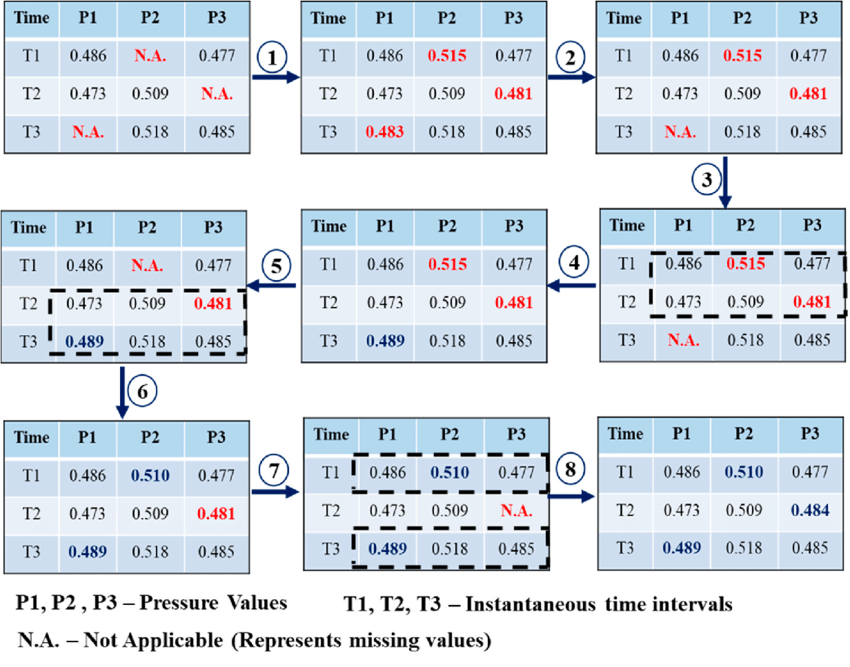